# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

In [ ]:
#importing pandas
import pandas as pd

#connecting drive to google collab
from google.colab import drive
drive.mount('/content/drive')

# Loading the CSV file
data = pd.read_csv("/content/drive/MyDrive/Classroom/star_classification.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Question 1: Are there any missing values and duplicate instances in the dataset? If so, how will you handle them?>

In [ ]:
total_length = len(data)

# Print total length
print("Total length of data:", total_length)

Total length of data: 68831


In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()

# Display count of missing values for each column
print(missing_values)

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              1
z              1
run_ID         1
rerun_ID       1
cam_col        1
field_ID       1
spec_obj_ID    1
class          1
redshift       1
plate          1
MJD            1
fiber_ID       1
dtype: int64


In [ ]:
# Check for duplicate items
duplicates = data.duplicated()

# Counting the number of duplicate items
num_duplicates = duplicates.sum()

print("Number of duplicate instances:", num_duplicates)


Number of duplicate instances: 0


In [ ]:
#To handle the cases

# Fill missing values with column mean
missing_values = missing_values.fillna(data.mean())

# Droping the duplicate items
data = data.drop_duplicates()

print("AFTER HANDALING THE CASES")
print(missing_values)
print("Number of unique data:", len(data))

AFTER HANDALING THE CASES
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              1
z              1
run_ID         1
rerun_ID       1
cam_col        1
field_ID       1
spec_obj_ID    1
class          1
redshift       1
plate          1
MJD            1
fiber_ID       1
dtype: int64
Number of unique data: 68831


<ipython-input-6-0ef24a367f02>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  missing_values = missing_values.fillna(data.mean())


Summarizing your analysis and observation

In [ ]:
print("so there was no duplicate cases and the missing values can")
print("be handeled by either dropping them or filling data mean instead of the missing vale")

so there was no duplicate cases and the missing values can
be handeled by either dropping them or filling data mean instead of the missing vale


<Question 2:What is the distribution of the different classes (star, galaxy, quasar) in the dataset? How do the spectral characteristics (u, g, r, i, z) vary for different classes of objects? Visualize the distributions or calculate the summary statistics for each class.**bold text**>

In [ ]:
# importing matplot
import matplotlib.pyplot as plt


In [ ]:
# checking the data
class_distribution = data['class'].value_counts()
print(class_distribution)

GALAXY    41116
STAR      14856
QSO       12858
Name: class, dtype: int64


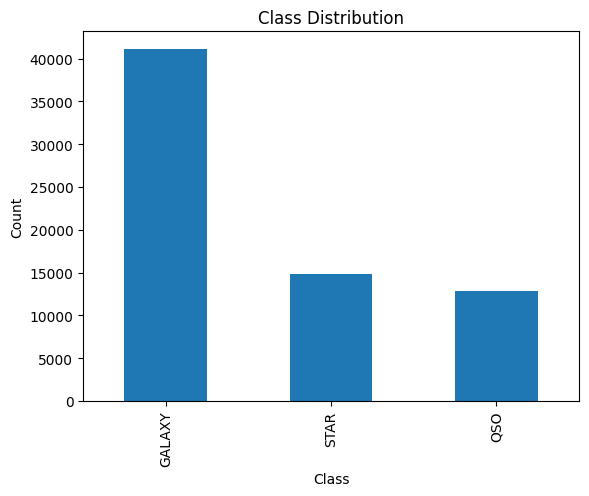

In [ ]:
# labelling data
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# identifying unique item in data
classes = data['class'].unique()

Class: GALAXY
                  u             g             r             i             z
count  41116.000000  41116.000000  41116.000000  41116.000000  41116.000000
mean      22.587816     20.900066     19.580069     18.844974     18.444944
std        2.260400      2.102601      1.868085      1.683065      1.655009
min       13.897990     12.679020     11.746640     11.299560     10.918470
25%       20.788710     18.915330     17.822308     17.381205     17.097833
50%       22.840470     21.569425     20.093495     19.214250     18.758935
75%       24.212682     22.435972     20.956505     19.931305     19.462302
max       29.325650     31.602240     29.571860     30.163590     29.383740


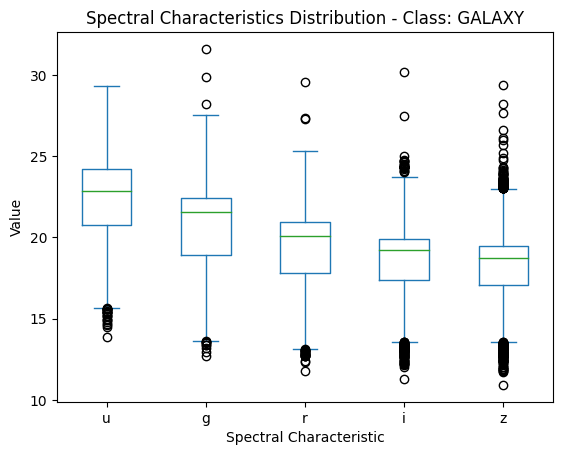

Class: QSO
                  u             g             r             i             z
count  12858.000000  12858.000000  12858.000000  12858.000000  12858.000000
mean      21.551278     20.923629     20.620116     20.427101     20.261240
std        1.506702      1.166184      1.086237      1.079157      1.096923
min       10.996230     13.662170     12.357630     12.637440     11.302470
25%       20.627713     20.248345     20.000263     19.804800     19.642743
50%       21.507380     21.062645     20.774790     20.579830     20.369135
75%       22.295755     21.688245     21.412180     21.201747     20.994087
max       32.781390     27.072670     27.397090     30.154600     26.296900


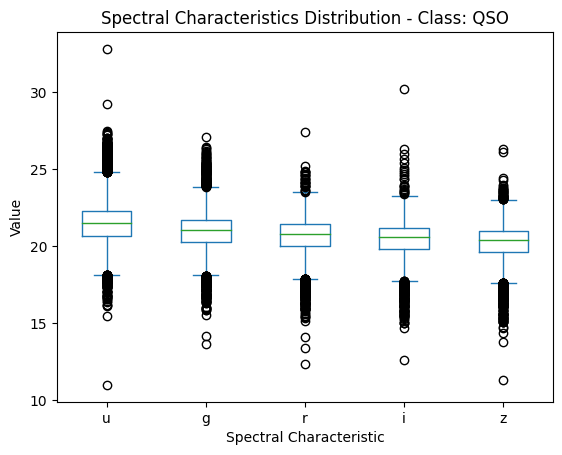

Class: STAR
                  u             g             r             i             z
count  14856.000000  14856.000000  14856.000000  14856.000000  14856.000000
mean      21.181600     19.644372     18.976764     18.574999     18.365560
std        2.354575      2.112208      1.964461      1.840254      1.844154
min       12.262400     10.511390      9.822070      9.469903      9.612333
25%       19.351863     18.057840     17.484755     17.178410     17.000870
50%       21.050965     19.584575     18.990265     18.612750     18.346085
75%       22.988335     21.251460     20.590475     20.086405     19.766182
max       30.660390     30.607000     29.374110     30.250090     26.427790


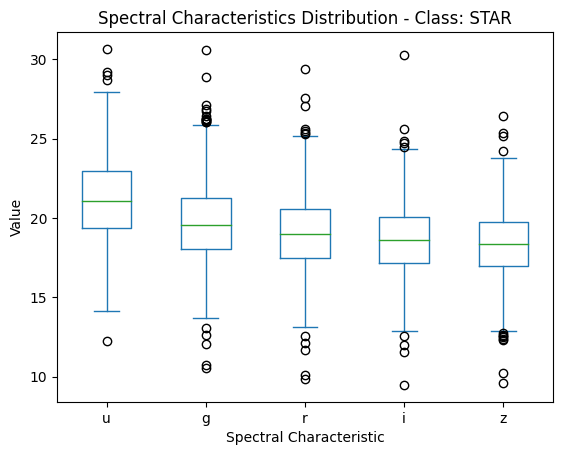

In [ ]:
for cls in classes[0:3]:
    # Filtering data
    class_data = data[data['class'] == cls]

    spectral_stats = class_data[['u', 'g', 'r', 'i', 'z']].describe()
    print("Class:", cls)
    print(spectral_stats)
    cls = str(cls)

    # dividing the data
    class_data[['u', 'g', 'r', 'i', 'z']].plot(kind='box')
    plt.xlabel('Spectral Characteristic')
    plt.ylabel('Value')
    plt.title('Spectral Characteristics Distribution - Class: ' + cls)
    plt.show()

Summarizing your analysis and observations

In [ ]:
print("hence the overall data is distributed by making 3 seperate graphs")

<Question 3:How do the spectral characteristics (described by the 17 feature columns) vary across different classes (stars, galaxies, quasars)? Create visualizations like box plots, violin plots, or histograms to explore their distributions.>

In [ ]:
# labelling data
stars_data = data[data['class'] == 'STAR']
galaxies_data = data[data['class'] == 'GALAXY']
quasars_data = data[data['class'] == 'QUASAR']

spectral_cols = ['u', 'g', 'r', 'i', 'z']



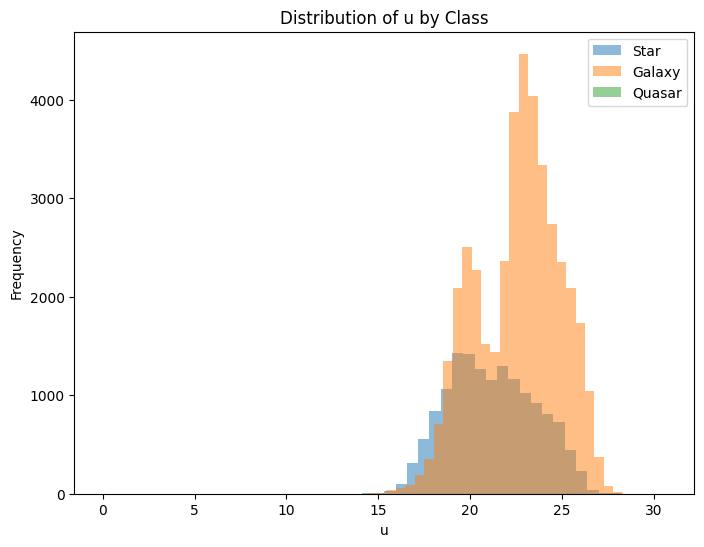

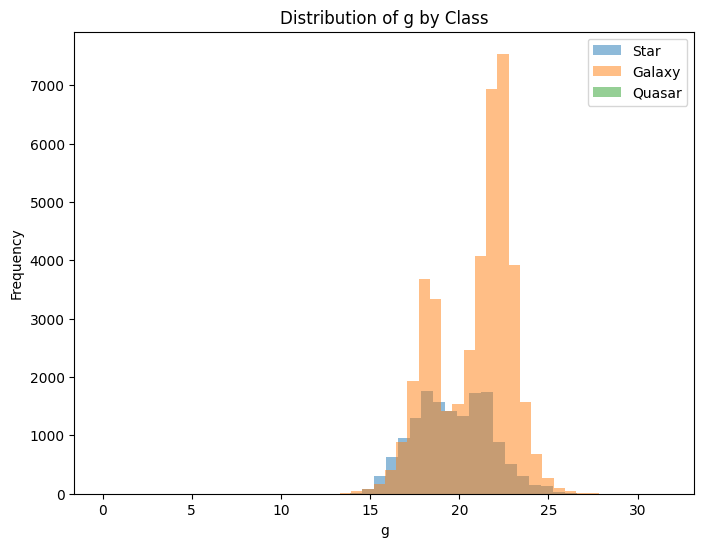

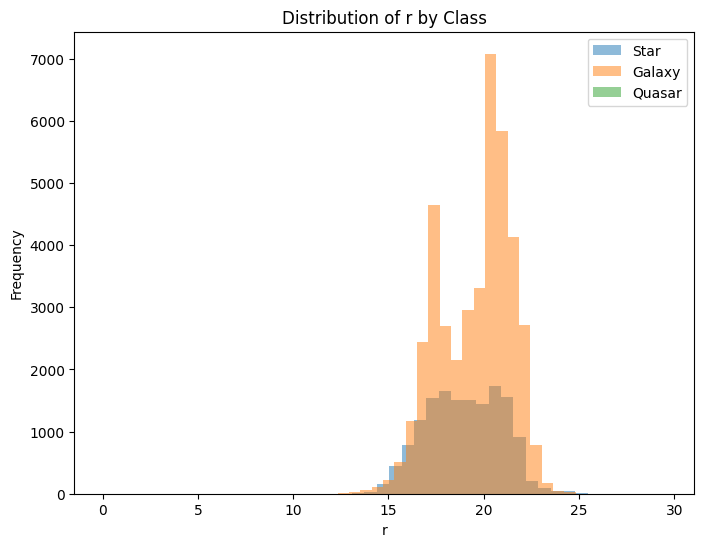

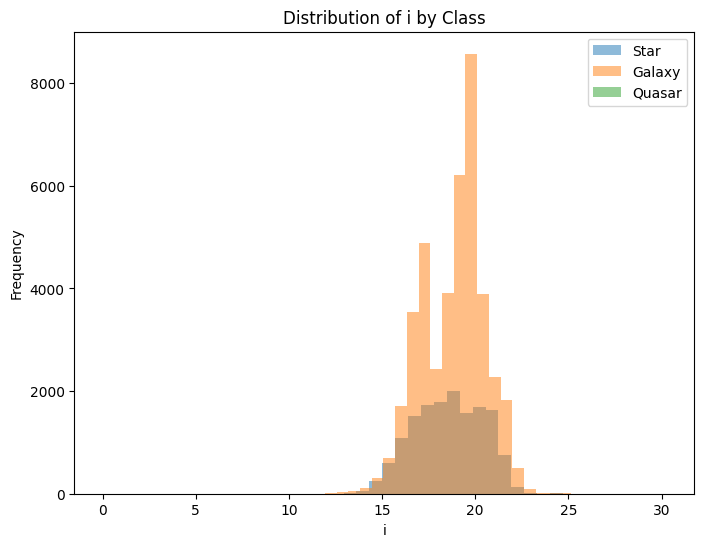

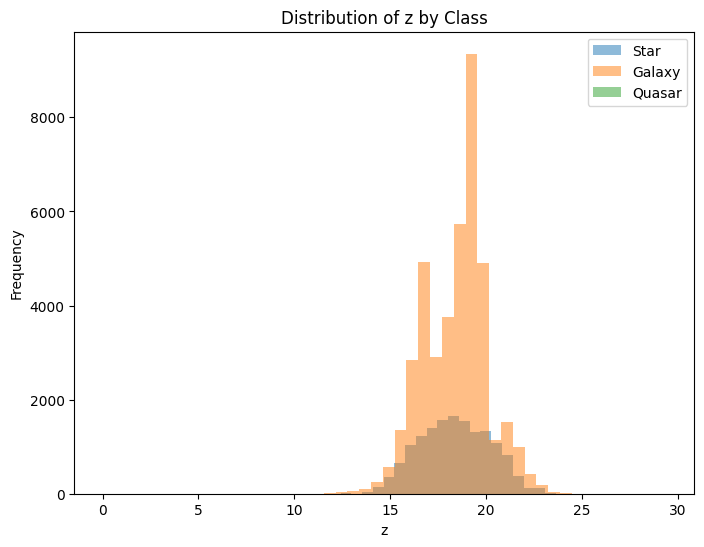

In [ ]:
# plotting data
for col in spectral_cols:

    # Creating histograms
    plt.figure(figsize=(8, 6))
    plt.hist(stars_data[col], alpha=0.5, label='Star', bins=30)
    plt.hist(galaxies_data[col], alpha=0.5, label='Galaxy', bins=30)
    plt.hist(quasars_data[col], alpha=0.5, label='Quasar', bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {} by Class'.format(col))
    plt.legend()
    plt.show()


Summarizing your analysis and observation

In [ ]:
print("plotting histogram for each of the data of star, galaxy and quasar according to the division of u,g,r,i,z")

plotting histogram for each of the data of star, galaxy and quasar according to the division of u,g,r,i,z


<Question 4:Perform feature encoding or transformation on categorical variables (such as run_ID, rerun_ID) in the dataset? Which encoding technique would be most suitable?>

In [ ]:
categorical_vars = ['run_ID', 'rerun_ID']

# Applying one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_vars)


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for var in categorical_vars:
    data[var] = label_encoder.fit_transform(data[var])

# Display the encoded dataset
print(data.head())

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371     130         0      2.0      79.0  6.543777e+18   
1  21.16812  21.61427     204         0      5.0     119.0  1.176014e+19   
2  19.34857  18.94827     130         0      2.0     120.0  5.152200e+18   
3  20.50454  19.25010     186         0      3.0     214.0  1.030107e+19   
4  15.97711  15.54461     372         0      3.0     137.0  6.891865e+18   

    class  redshift    plate      MJD  fiber_ID  
0  GALAXY  0.634794   5812.0  56354.0     171.0  
1  GALAXY 

Summarizing your analysis and observations

In [ ]:
print("I have used ONE HOT ENCODING technique to represent categorical variables as numerical values")

print("ADVANTAGES")
print("1.helps in numerical data input")
print("2.improves model performanec")

print("the suitable technique for every code is different depending on the data and what all tasks we have to perform on it")

<Question 5:Analyze the distribution and range of values for each spectral feature in the dataset. Are there any outliers or extreme values?>

In [ ]:
# printing encoded dataset
print(encoded_data.head())


         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  cam_col  field_ID  ...  run_ID_382 run_ID_383  \
0  19.16573  18.79371      2.0      79.0  ...           0          0   
1  21.16812  21.61427      5.0     119.0  ...           0          0   
2  19.34857  18.94827      2.0     120.0  ...           0          0   
3  20.50454  19.25010      3.0     214.0  ...           0          0   
4  15.97711  15.54461      3.0     137.0  ...           0          0   

   run_ID_384  run_ID_385  run_ID_386  run_ID_387  run_ID_388  run_ID_389  \
0           0           0           0           0        

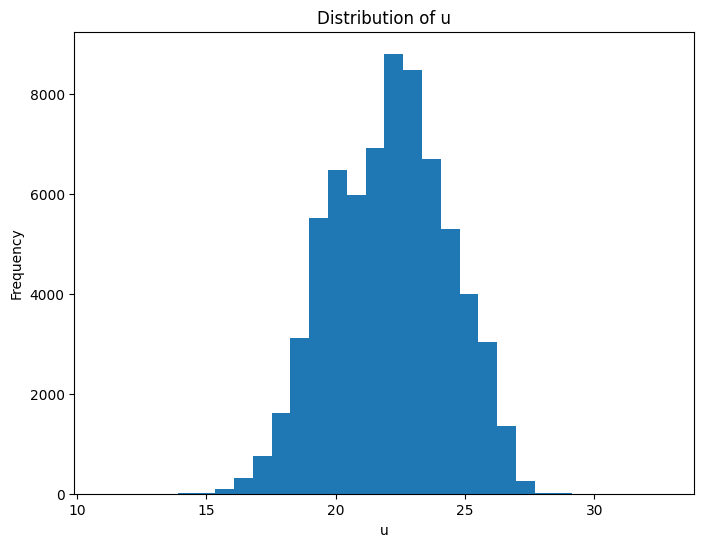

Summary statistics for u:
count    68831.000000
mean        22.090688
std          2.247890
min         10.996230
25%         20.358150
50%         22.191850
75%         23.700475
max         32.781390
Name: u, dtype: float64


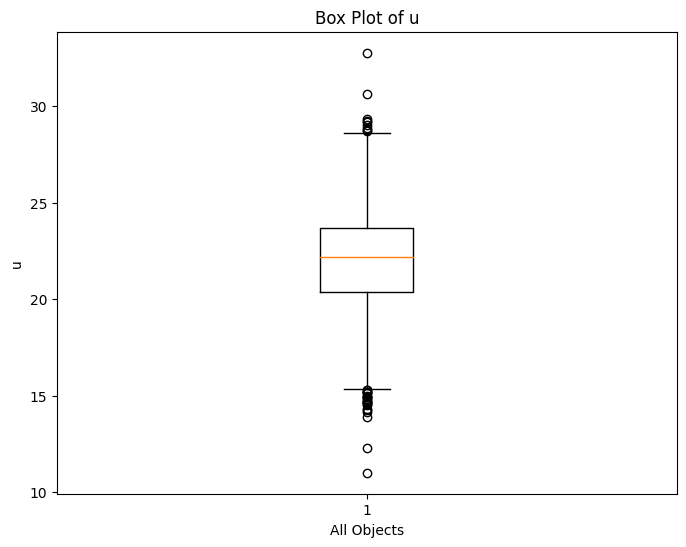

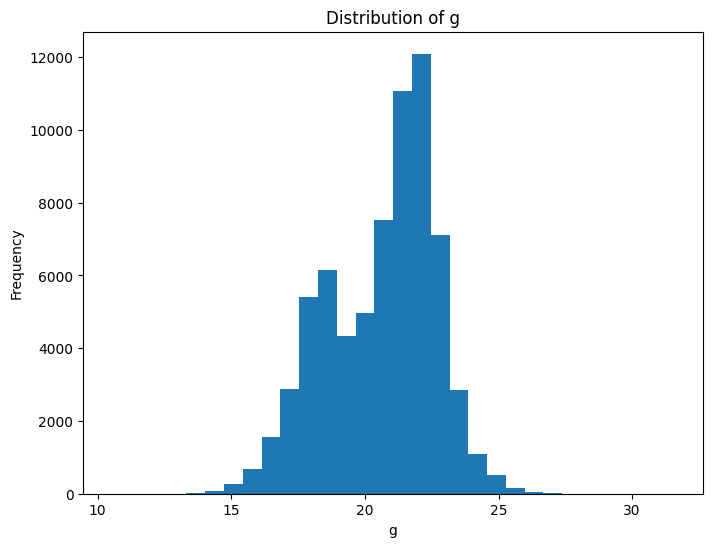

Summary statistics for g:
count    68831.000000
mean        20.633476
std          2.031533
min         10.511390
25%         18.972680
50%         21.102640
75%         22.122685
max         31.602240
Name: g, dtype: float64


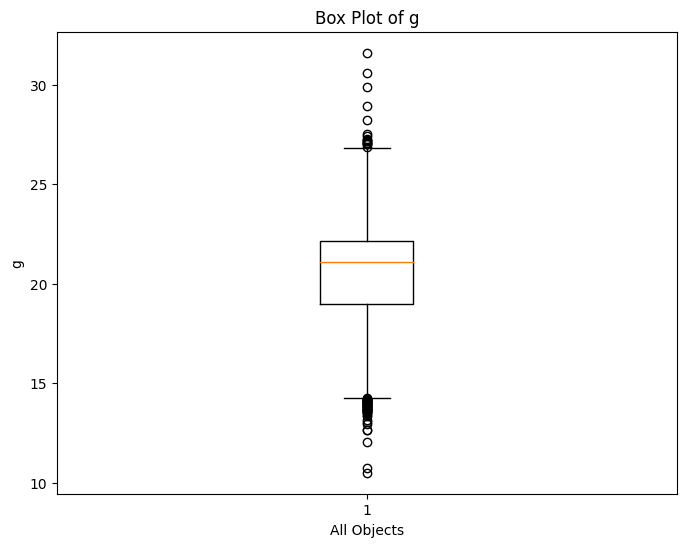

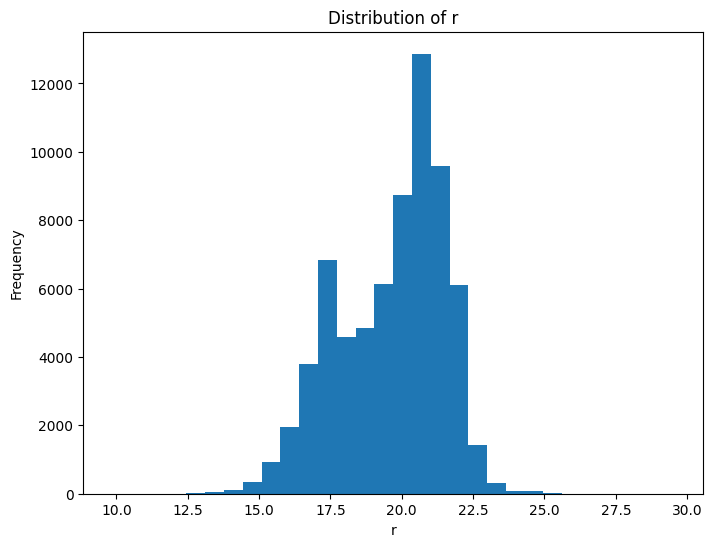

Summary statistics for r:
count    68831.000000
mean        19.644177
std          1.847823
min          9.822070
25%         18.141505
50%         20.120250
75%         21.039110
max         29.571860
Name: r, dtype: float64


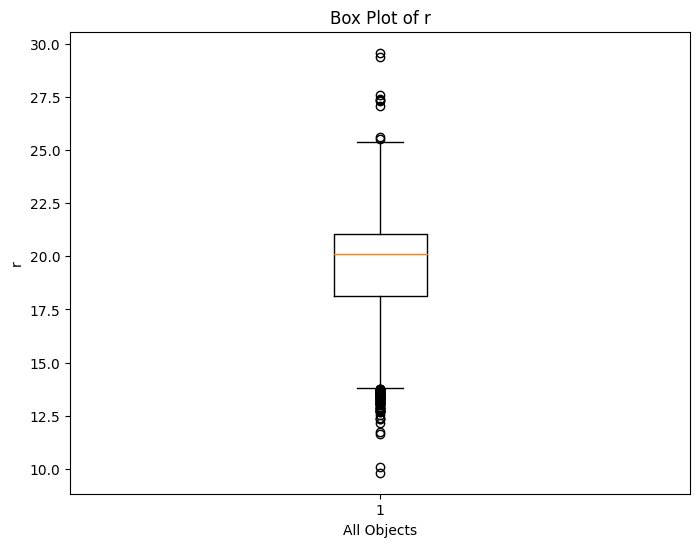

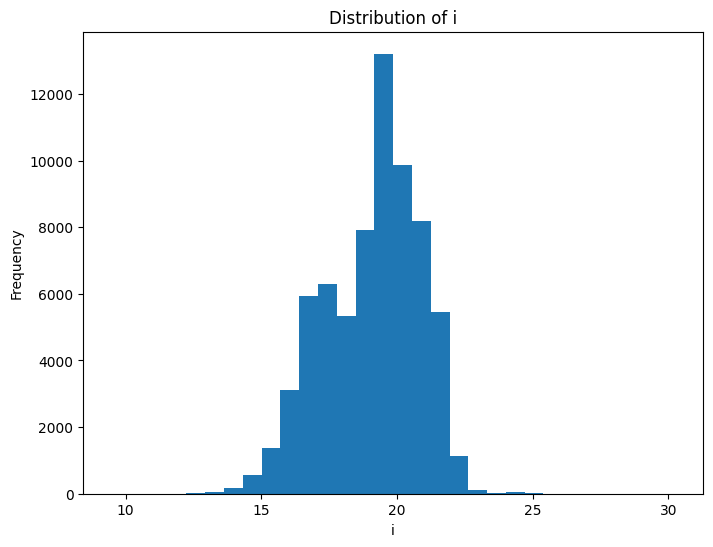

Summary statistics for i:
count    68830.000000
mean        19.082258
std          1.751455
min          9.469903
25%         17.733223
50%         19.396915
75%         20.384055
max         30.250090
Name: i, dtype: float64


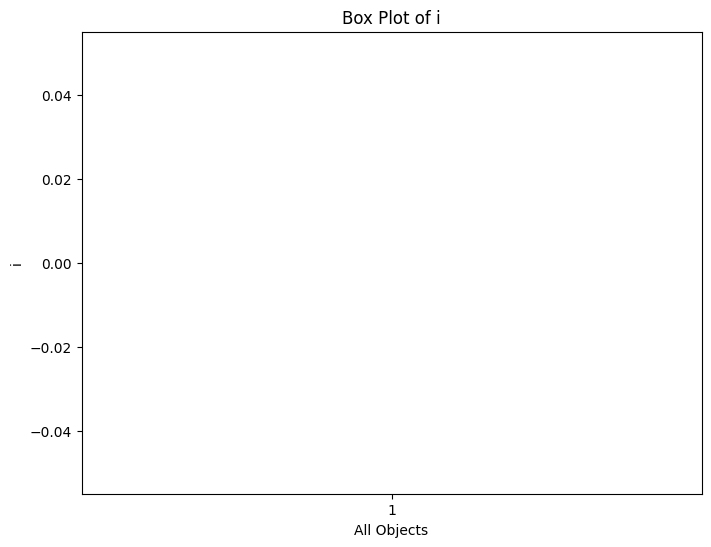

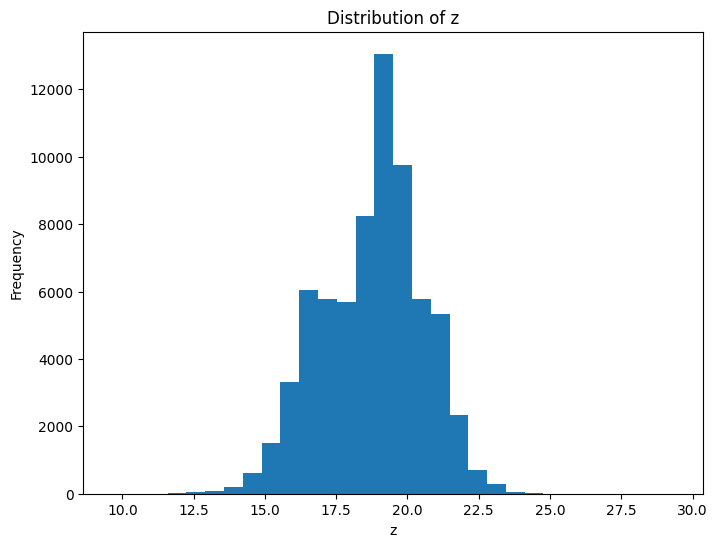

Summary statistics for z:
count    68830.000000
mean        18.767109
std          1.763173
min          9.612333
25%         17.461400
50%         18.997650
75%         19.913520
max         29.383740
Name: z, dtype: float64


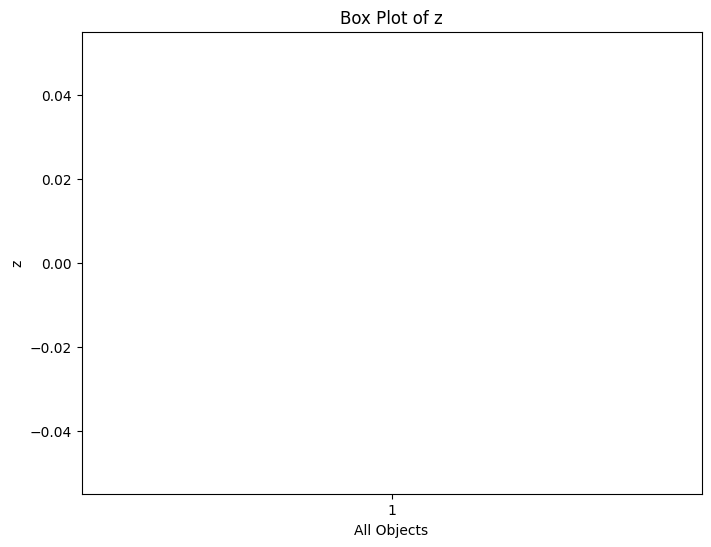

In [ ]:
# Analyze the distribution and range of values for each spectral feature
for feature in spectral_features:
    # Plotting histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data[feature], bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()

    # Summarising the graphs
    print(f'Summary statistics for {feature}:')
    print(data[feature].describe())

    # plotting Box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[feature])
    plt.xlabel('All Objects')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()

Summarizing your analysis and observation

In [ ]:
print("the above histogram plots shows the range of each spectral feature ")
print("the above box plot shows the extreme values")

the above histogram plots shows the range of each spectral feature 
the above box plot shows the extreme values


# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



In [ ]:
#importing files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Data preprocessing(dropping rows with missing values)
data.dropna(inplace=True)

In [ ]:
# Feature Engineering(selecting necessary features for division)
features = ['u', 'g', 'r', 'i', 'z']
X = data[features]
y = data['class']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection
model = LogisticRegression()

# Model training
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Model Evaluation:')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report)

Model Evaluation:
Accuracy: 0.7576638093854424
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.80      0.91      0.85      8158
         QSO       0.67      0.78      0.72      2608
        STAR       0.69      0.32      0.44      3000

    accuracy                           0.76     13766
   macro avg       0.72      0.67      0.67     13766
weighted avg       0.75      0.76      0.74     13766



In [ ]:
# Make predictions
new_data = pd.DataFrame([[1.2, 0.8, 1.0, 0.9, 1.1]], columns=features)
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print('Prediction:', prediction)

Prediction: ['STAR']
